<a href="https://colab.research.google.com/github/abinayaa123/ME592/blob/main/ME592_ESHM_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ME592 Engineering Systems Health Monitoring - HW2

March 10, 2022

Abinayaa Dhanagopal (Task 3), Casey Robinson (Task 1, 2), Henry Croll (Task 4), Nianyu Jiang (Task 6), Timilehin Ayanlade (Task 5)

Homework was divided by task, but each team member reviewed and provided input on the others' code and results.

# Task 1

The maximum point-to-point change in Mains, as percentage of the range, is  0.66 % before processing, and  0.59 % after processing
The maximum point-to-point change in HVAC, as percentage of the range, is  0.69 % before processing, and  0.62 % after processing
The maximum point-to-point change in Lighting, as percentage of the range, is  1.23 % before processing, and  1.2 % after processing
The maximum point-to-point change in Appliances, as percentage of the range, is  0.84 % before processing, and  0.75 % after processing
The maximum point-to-point change in Other, as percentage of the range, is  0.88 % before processing, and  0.8500000000000001 % after processing


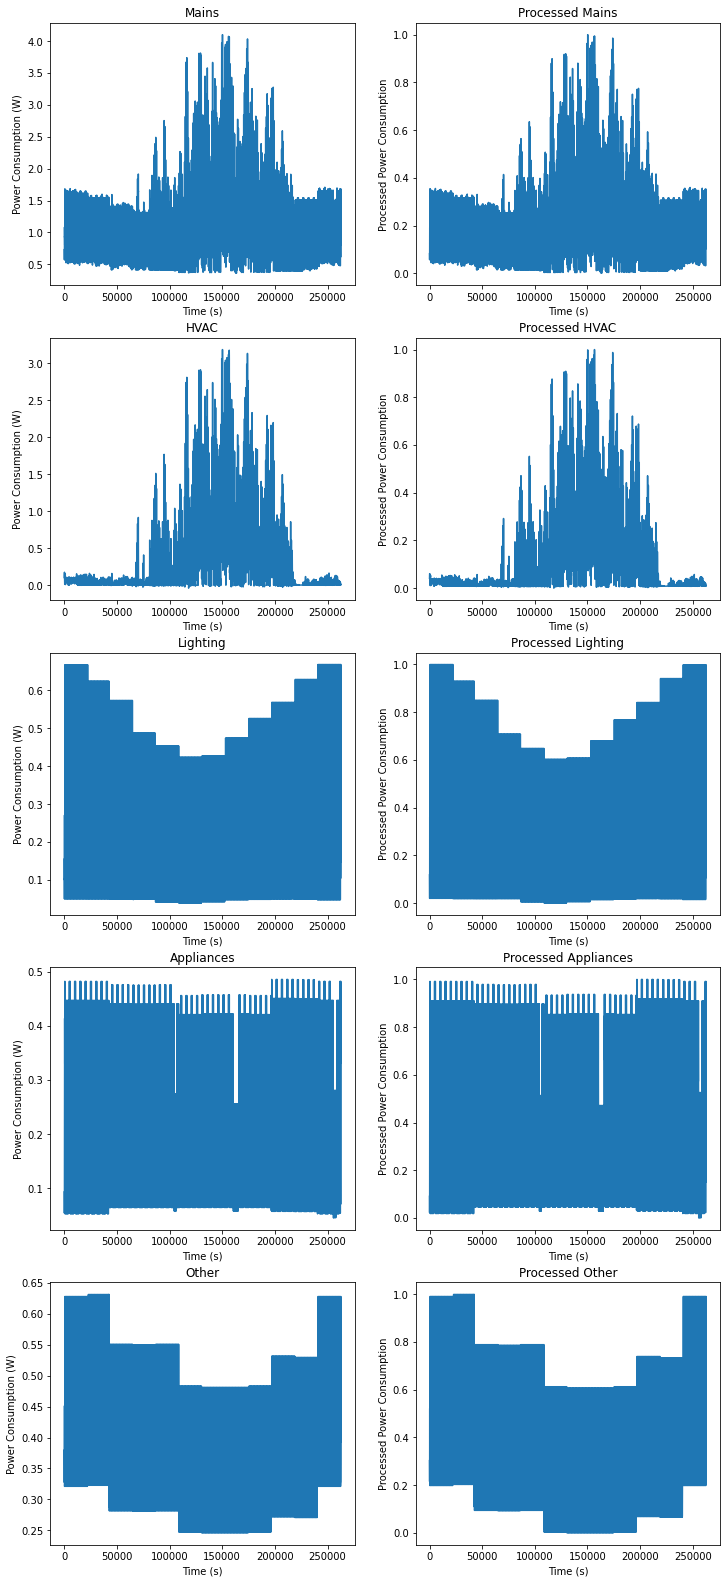

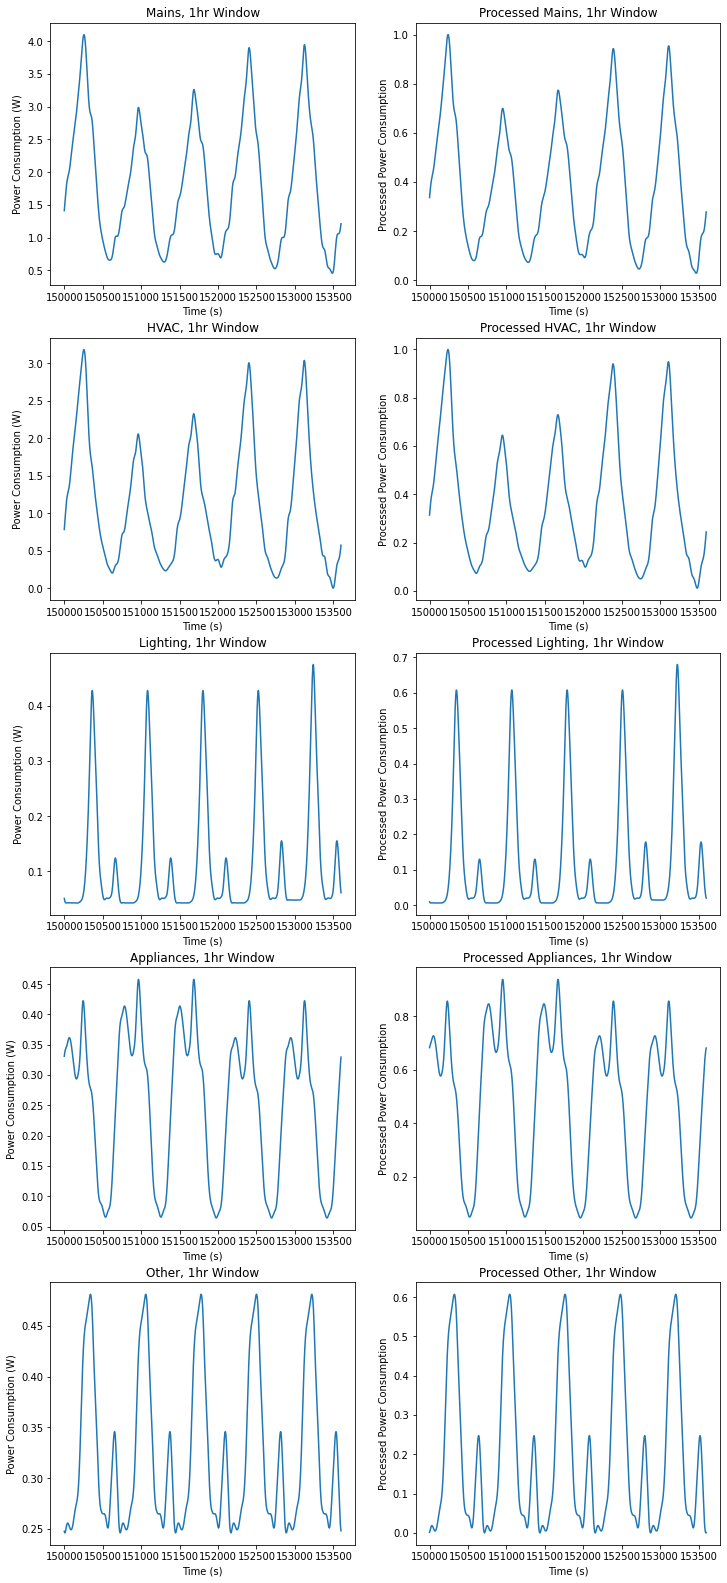

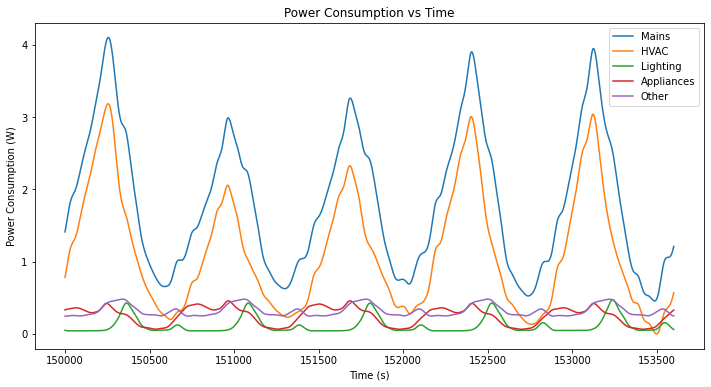

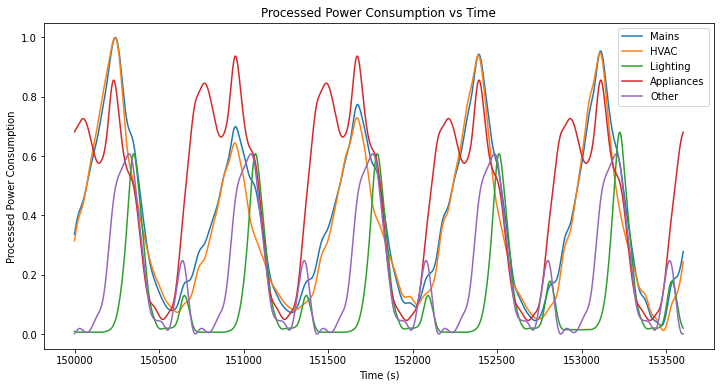

In [ ]:
#Task 1, Perform pre-processing of all the variables (crobinson)
import numpy as np
import scipy.io
import matplotlib as mpl
from matplotlib import pyplot as plt

#Data import
#Source data is five (5) individual .mat files containing 1D column vectors, size 262800x1
#Data is power consumption in W logged at 1Hz
#In .mat files, variable names are as follows: MAINS = y1, HVAC = y2, LIGHTING = y3, APPLIANCES = y4, OTHER_LOADS = y5

mains = scipy.io.loadmat('MAINS.mat')
hvac = scipy.io.loadmat('HVAC.mat')
lighting = scipy.io.loadmat('LIGHTING.mat')
appliances = scipy.io.loadmat('APPLIANCES.mat')
other = scipy.io.loadmat('OTHER_LOADS.mat')

mains_raw=mains['y1']
hvac_raw=hvac['y2']
lighting_raw=lighting['y3']
appliances_raw=appliances['y4']
other_raw=other['y5']
t=np.arange(0,mains_raw.size)
mov_avg_window=30

#Data inspection for outliers
def find_max_rel_change(input_array):
  input_array=input_array.flatten()
  max_change=np.amax(np.diff(input_array))/(np.amax(input_array)-np.amin(input_array))
  return max_change
      
#Data preprocessing - normalization, denoising (via 10sec moving average)
def process_data(input_array):
  flattened_array=input_array.flatten()
  mov_avg_array=np.convolve(flattened_array, np.ones(mov_avg_window), 'valid') / mov_avg_window
  processed_array=(mov_avg_array-np.amin(mov_avg_array))/(np.amax(mov_avg_array)-np.amin(mov_avg_array))
  return processed_array

mains_proc_test=process_data(mains_raw)
hvac_proc_test=process_data(hvac_raw)
lighting_proc_test=process_data(lighting_raw)
appliances_proc_test=process_data(appliances_raw)
other_proc_test=process_data(other_raw)
t_proc=np.arange(0,mains_proc_test.size)

print('The maximum point-to-point change in Mains, as percentage of the range, is ',np.round(find_max_rel_change(mains_raw),4)*100,'% before processing, and ',np.round(find_max_rel_change(mains_proc_test),4)*100, '% after processing')
print('The maximum point-to-point change in HVAC, as percentage of the range, is ',np.round(find_max_rel_change(hvac_raw),4)*100,'% before processing, and ',np.round(find_max_rel_change(hvac_proc_test),4)*100, '% after processing')
print('The maximum point-to-point change in Lighting, as percentage of the range, is ',np.round(find_max_rel_change(lighting_raw),4)*100,'% before processing, and ',np.round(find_max_rel_change(lighting_proc_test),4)*100, '% after processing')
print('The maximum point-to-point change in Appliances, as percentage of the range, is ',np.round(find_max_rel_change(appliances_raw),4)*100,'% before processing, and ',np.round(find_max_rel_change(appliances_proc_test),4)*100, '% after processing')
print('The maximum point-to-point change in Other, as percentage of the range, is ',np.round(find_max_rel_change(other_raw),4)*100,'% before processing, and ',np.round(find_max_rel_change(other_proc_test),4)*100, '% after processing')

#Data plotting to visualize raw and processed data.
#Purpose is to confirm normalization and moving average worked correctly
plotwindow_lb=150000
plotwindow_ub=153600
lb=plotwindow_lb
ub=plotwindow_ub

fig1,axs1 = plt.subplots(5,2,figsize=(12,28))
axs1[0,0].plot(t, mains_raw)
axs1[0,1].plot(t_proc,mains_proc_test)
axs1[1,0].plot(t, hvac_raw)
axs1[1,1].plot(t_proc, hvac_proc_test)
axs1[2,0].plot(t, lighting_raw)
axs1[2,1].plot(t_proc, lighting_proc_test)
axs1[3,0].plot(t, appliances_raw)
axs1[3,1].plot(t_proc, appliances_proc_test)
axs1[4,0].plot(t, other_raw)
axs1[4,1].plot(t_proc, other_proc_test)

fig2,axs2 = plt.subplots(5,2,figsize=(12,28))
axs2[0,0].plot(t[lb:ub], mains_raw[lb:ub])
axs2[0,1].plot(t_proc[lb:ub], mains_proc_test[lb:ub])
axs2[1,0].plot(t[lb:ub], hvac_raw[lb:ub])
axs2[1,1].plot(t_proc[lb:ub], hvac_proc_test[lb:ub])
axs2[2,0].plot(t[lb:ub], lighting_raw[lb:ub])
axs2[2,1].plot(t_proc[lb:ub], lighting_proc_test[lb:ub])
axs2[3,0].plot(t[lb:ub], appliances_raw[lb:ub])
axs2[3,1].plot(t_proc[lb:ub], appliances_proc_test[lb:ub])
axs2[4,0].plot(t[lb:ub], other_raw[lb:ub])
axs2[4,1].plot(t_proc[lb:ub], other_proc_test[lb:ub])

titles = np.array(['Mains', 'HVAC', 'Lighting', 'Appliances', 'Other'])

for x in range (0,5):
  for y in range (0,2):
    axs1[x,y].set_xlabel('Time (s)')
    axs2[x,y].set_xlabel('Time (s)')
    if y<1:
      axs1[x,y].set_ylabel('Power Consumption (W)')
      axs2[x,y].set_ylabel('Power Consumption (W)')
      axs1[x,y].set_title(titles[x])
      axs2[x,y].set_title(titles[x]+', 1hr Window')
    else:
      axs1[x,y].set_ylabel('Processed Power Consumption')
      axs2[x,y].set_ylabel('Processed Power Consumption')
      axs1[x,y].set_title('Processed '+ titles[x])
      axs2[x,y].set_title('Processed '+ titles[x]+', 1hr Window')

fig3,ax3 = plt.subplots(figsize=(12,6))
ax3.plot(t[lb:ub],mains_raw[lb:ub],label='Mains')
ax3.plot(t[lb:ub],hvac_raw[lb:ub],label='HVAC')
ax3.plot(t[lb:ub],lighting_raw[lb:ub],label='Lighting')
ax3.plot(t[lb:ub],appliances_raw[lb:ub],label='Appliances')
ax3.plot(t[lb:ub],other_raw[lb:ub],label='Other')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Power Consumption (W)')
ax3.set_title('Power Consumption vs Time')
ax3.legend()
plt.show

fig4,ax4 = plt.subplots(figsize=(12,6))
ax4.plot(t_proc[lb:ub],mains_proc_test[lb:ub],label='Mains')
ax4.plot(t_proc[lb:ub],hvac_proc_test[lb:ub],label='HVAC')
ax4.plot(t_proc[lb:ub],lighting_proc_test[lb:ub],label='Lighting')
ax4.plot(t_proc[lb:ub],appliances_proc_test[lb:ub],label='Appliances')
ax4.plot(t_proc[lb:ub],other_proc_test[lb:ub],label='Other')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Processed Power Consumption')
ax4.set_title('Processed Power Consumption vs Time')
ax4.legend()
plt.show

#Final Output of data preprocessing - use for Tasks 2 through 6
mains_proc=mains_proc_test
hvac_proc=hvac_proc_test
lighting_proc=lighting_proc_test
appliances_proc=appliances_proc_test
other_proc=other_proc_test

Task 1 Discussion:

Preprocessing of data was completed, including normalization and de-noising. Data was normalized such that the minimum value in the array was zero (0) and the maximum value was one (1). The de-noising method chosen was a simple moving average (via np.convolve) with a 30 second window. No significant change in the signal was observed as evidenced by a metric that evaluated maximum point to point change (via np.diff), which was printed above the figures. Data was plotted for visual evaluation.

# Task 2

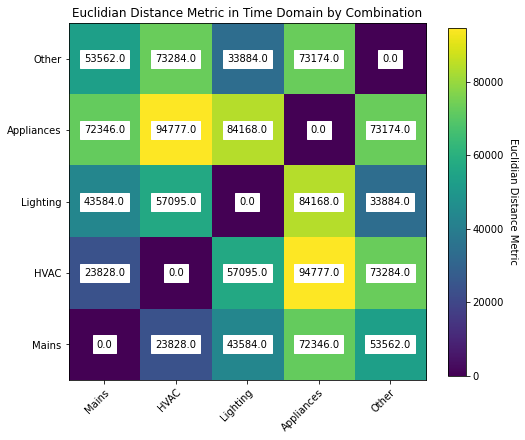

In [ ]:
#Task 2, Use direct Euclidean distance metric (crobinson)
#Define function to calculate euclidian distance metric
#Euclidian distance metric is calculated as sum of absolute values of element-wise differences between array1 and array2
def calculate_euclidian_dist(array1,array2):
  distance_metric=np.sum(np.abs(array1-array2))
  return distance_metric

#The following concatenates the five use cases to allow for indexing in a for loop.
#The nested for loop creates a 5x5 array containing the euclidian distance metric
#between each use case.
full_arr=[mains_proc,hvac_proc,lighting_proc,appliances_proc,other_proc]
use_case = ['Mains','HVAC','Lighting','Appliances','Other']
euclid_dist_array=np.zeros((5,5))
for x in range (0,5):
  for y in range (0,5):
      euclid_dist_array[x,y]=calculate_euclidian_dist(full_arr[x],full_arr[y])

#Plot the euclidian distance metrics for each use case combination    
fig, ax = plt.subplots(figsize=(8,8))
im=ax.imshow(euclid_dist_array,origin='lower')
ax.set_xticks(np.arange(len(use_case)))
ax.set_yticks(np.arange(len(use_case)))
ax.set_xticklabels(use_case)
ax.set_yticklabels(use_case)
cbar = ax.figure.colorbar(im, ax=ax,shrink=0.8)
cbar.ax.set_ylabel('Euclidian Distance Metric', rotation=-90, va="bottom")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
for j in range(len(use_case)):
    for i in range(len(use_case)):
        text = ax.text(j, i, np.rint(euclid_dist_array[i, j]),ha="center", va="center", backgroundcolor="w")
ax.set_title("Euclidian Distance Metric in Time Domain by Combination")
plt.show()

Task 2 discussion:

Euclidian distance metric was calculated for all possible combinations of the source data. Each distance metric is plotted in a heat map with a color bar. A euclidian distance value of zero (0) would indicate maximum similarity (i.e. the two signals are the same). Higher values indicate more dissimilarity.

In order of most-similar (#1) to least-similar (#10), the results are:
1.   Mains vs HVAC
2.   Lighting vs Other
3.   Mains vs Lighting
4.   Mains vs Other
5.   HVAC vs Lighting
6.   Mains vs Appliances
7.   Appliances vs Other
8.   HVAC vs Other
9.   Lighting vs Appliances
10.  HVAC vs Appliances 

# Task 3

In [ ]:
#adhanagopal
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import pi
from scipy.fftpack import fft, fftfreq
from scipy import signal

0.002778094911900141
7.611218936712715e-06
0.002778094911900141
0.002778094911900141
0.002778094911900141


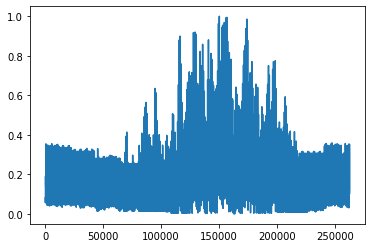

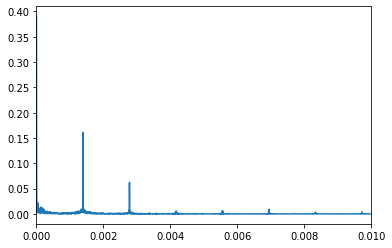

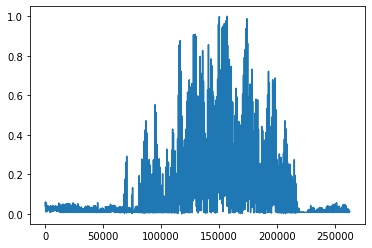

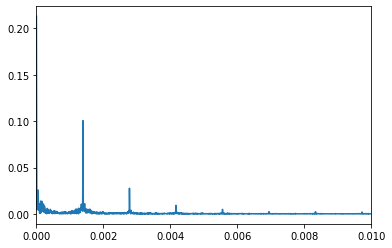

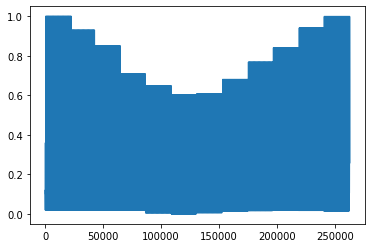

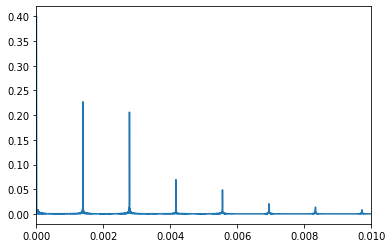

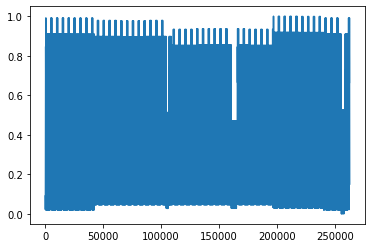

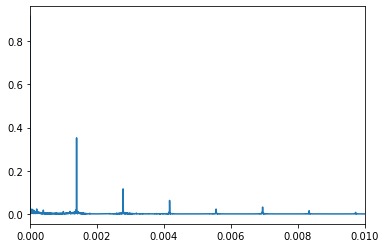

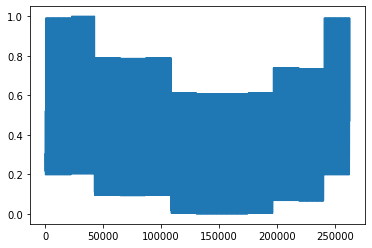

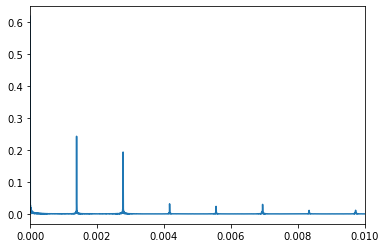

In [ ]:
# Convert the data to frequency domain using FFT and then do a comparison using
#working code but need to verify results
def fourier_transform(data):
  N = len(data)
  df = pd.DataFrame(data, columns=['Data']) 
  time = range(0,N)
  plt.figure()
  plt.plot(time, df['Data'])
  frequency = fftfreq(N, 1)[:N//2]
  freq_data = fft(df['Data'].values)
  y = 2/N*np.abs(freq_data[0:int(N/2)])
  mid = int(N/2)
  plt.figure()
  plt.plot(frequency,y)
  plt.xlim(0,.01) # To note the points of dominant frequency
  return y

mains_fft = fourier_transform(mains_proc)
hvac_fft = fourier_transform(hvac_proc)
lighting_fft = fourier_transform(lighting_proc)
appliances_fft = fourier_transform(appliances_proc)
other_fft = fourier_transform(other_proc)

#print dominant frequencies
N = len(mains_fft)
frequency = fftfreq(N, 1)[:N//2]
print(frequency[np.argmax(mains_fft[1:])+1]) 
print(frequency[np.argmax(hvac_fft[1:])+1])
print(frequency[np.argmax(lighting_fft[1:])+1])
print(frequency[np.argmax(appliances_fft[1:])+1])
print(frequency[np.argmax(other_fft[1:])+1])

After applying FFT, the dominant frequencies across different consumption use cases were all the same except for HVAC which was significantly lower.

Task 3

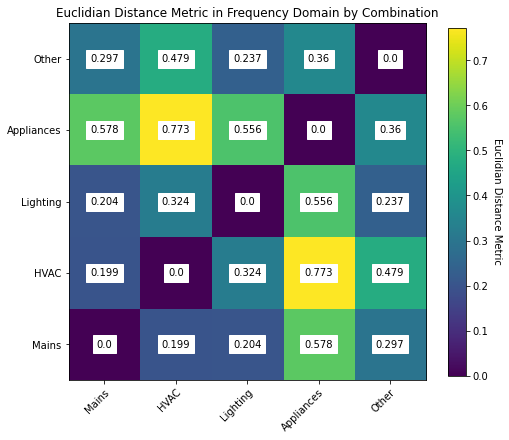

In [ ]:
# euclidean distance metric
def calculate_euclidian_dist(array1,array2):
  distance_metric=np.sqrt(np.sum(np.square(array1-array2)))
  return distance_metric

full_arr=[mains_fft,hvac_fft,lighting_fft,appliances_fft,other_fft]
use_case = ['Mains','HVAC','Lighting','Appliances','Other']
euclid_dist_array=np.zeros((5,5))
for x in range (0,5):
  for y in range (0,5):
      euclid_dist_array[x,y]=calculate_euclidian_dist(full_arr[x],full_arr[y])

fig, ax = plt.subplots(figsize=(8,8))
im=ax.imshow(euclid_dist_array,origin='lower')
ax.set_xticks(np.arange(len(use_case)))
ax.set_yticks(np.arange(len(use_case)))
ax.set_xticklabels(use_case)
ax.set_yticklabels(use_case)
cbar = ax.figure.colorbar(im, ax=ax,shrink=0.8)
cbar.ax.set_ylabel('Euclidian Distance Metric', rotation=-90, va="bottom")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
for j in range(len(use_case)):
    for i in range(len(use_case)):
        text = ax.text(j, i, np.round(euclid_dist_array[i, j],3),ha="center", va="center", backgroundcolor="w")
ax.set_title("Euclidian Distance Metric in Frequency Domain by Combination")
plt.show()

Task 3 discussion:
Euclidian distance metric in frequency domain was calculated for all possible combinations of the source data. Each distance metric is plotted in a heat map with a color bar.

A euclidian distance value of zero (0) would indicate maximum similarity (i.e. the two signals are the same). Higher values indicate more dissimilarity.

In order of most-similar (#1) to least-similar (#10), the results are:
1.   Mains vs HVAC
2.   Mains vs Lighting
3.   Lighting vs Other
4.   Mains vs Other
5.   HVAC vs Lighting
6.   Appliances vs Other
7.   HVAC vs Other
8.   Lighting vs Appliances
9.   Mains vs Appliances
10.  HVAC vs Appliances 

Differences are observed between the ranking resulting from Task 2 and Task 3. This would indicate dissimilarities in time domain may be due to a phase shift in any of the given signals. Calculating distance metric in frequency domain would show signal similarities that would be masked by this phasing.

# Task 4

In [ ]:
# Use KL Divergence metric and perform comparison (hcroll)

#Define manual function to calculate KL Divergence metric
#KL Divergence metric measures the difference between two probability
#distributions p(x) and q(x). In this use case, p(x) and q(x) represent 
#the different normalized data arrays, which we can compare with each other to 
#test how their probability distributions differ.

#First we create a KL divergence function using a built in scipy function
#source: https://www.statology.org/kl-divergence-python/
from scipy.special import rel_entr
def calc_KL(P,Q):
  KL_div = sum(rel_entr(P, Q))
  return KL_div

In [ ]:
#To validate the function we are using, we create two small test probability 
#distributions and calculate the KL divergence "by hand" to compare

#create bogus test array
P = [3/9, 5/9, 1/9]
Q = [4/9, 4/9, 1/9]

#KL divergence "by hand"
#source: http://hanj.cs.illinois.edu/cs412/bk3/KL-divergence.pdf#:~:text=Although%20the%20KL%20divergence%20measures%20the%20%E2%80%9Cdistance%E2%80%9D%20between,non-negativemeasure.DKL%28P%7C%7CQ%29%E2%89%A50%20andDKL%28P%7C%7CQ%29%20%3D%200%20if%20and%20only%20ifP%3DQ.
Test_KL1_val = np.sum(np.log(np.divide(P,Q))*P)

#KL divergence by function
Test_KL1 = calc_KL(P, Q)

#Compare two methods
print("Built-in function calculated KL =",Test_KL1,"and manual calculation verified KL =",Test_KL1_val,".")

Built-in function calculated KL = 0.02807461546841189 and manual calculation verified KL = 0.02807461546841189 .


In [ ]:
#Create probability distributions for both the pre-processed data and the 
#FFT data. Since we do not have a function describing the original data, we need
#to build some level of discreteness into the data. Since the data has been 
#normalized between 0-1, we will create 100 bins, from 0.00-0.01, 0.01-0.02, etc.

#create function to do this using the histogram command
def get_prob_dist(array):
  hist = np.histogram(array, bins = 100)
  prob = hist[0]/sum(hist[0])
  return(prob)

mains_prob = get_prob_dist(mains_proc)
hvac_prob = get_prob_dist(hvac_proc)
lighting_prob = get_prob_dist(lighting_proc)
appliances_prob = get_prob_dist(appliances_proc)
other_prob = get_prob_dist(other_proc)

<function matplotlib.pyplot.show>

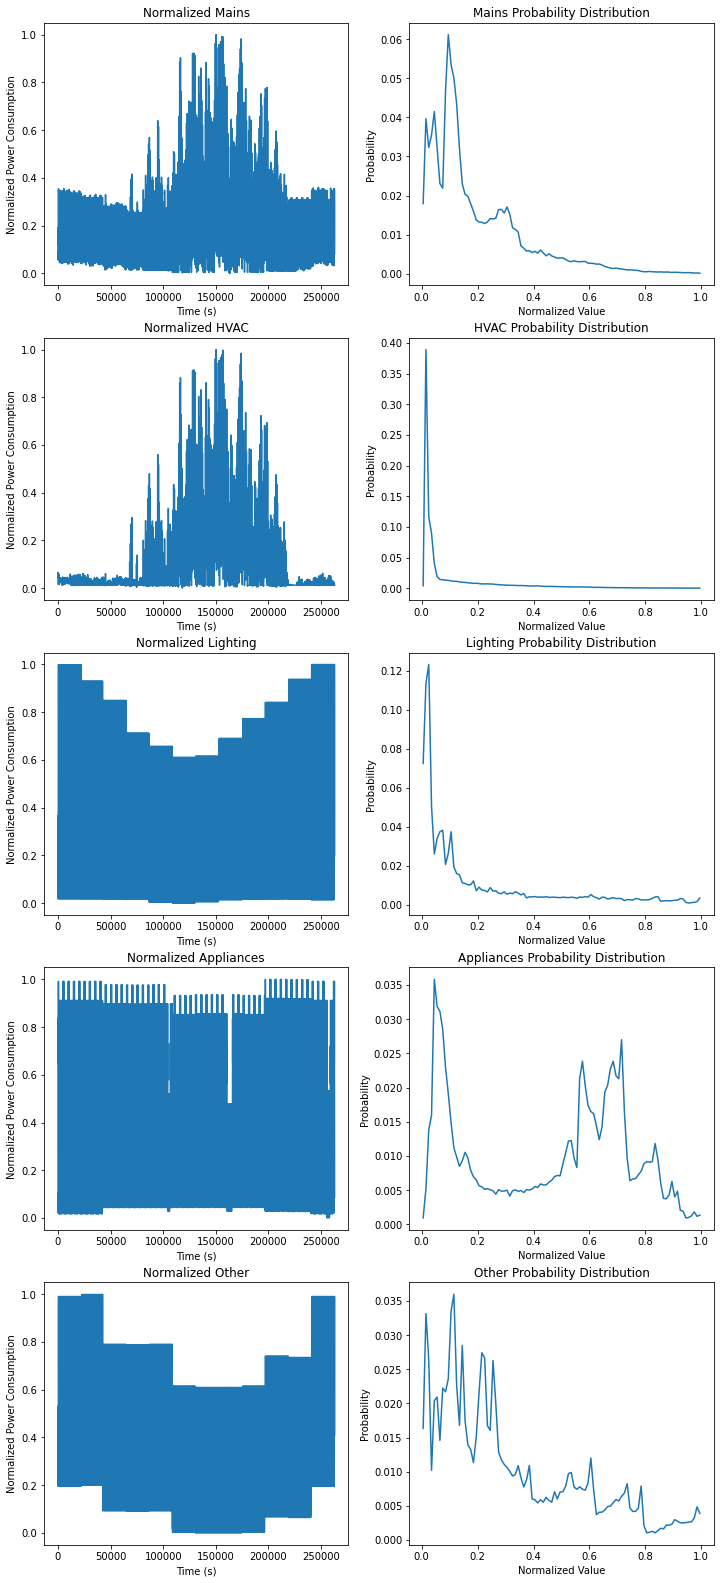

In [ ]:
#Data plotting to visualize normalized data with probability distributions
#Purpose is to confirm probability distributions worked correctly, and visually 
#inspect data to get a sense for which might have similar probability distributions

#create x array for probability distributions - choose middle of hist bins
x = np.linspace(0.005, 0.995, num=100)
    
fig1,axs1 = plt.subplots(5,2,figsize=(12,28))
axs1[0,0].plot(t_proc, mains_proc)
axs1[0,1].plot(x, mains_prob)
axs1[1,0].plot(t_proc, hvac_proc)
axs1[1,1].plot(x, hvac_prob)
axs1[2,0].plot(t_proc, lighting_proc)
axs1[2,1].plot(x, lighting_prob)
axs1[3,0].plot(t_proc, appliances_proc)
axs1[3,1].plot(x, appliances_prob)
axs1[4,0].plot(t_proc, other_proc)
axs1[4,1].plot(x, other_prob)

titles = np.array(['Mains', 'HVAC', 'Lighting', 'Appliances', 'Other'])

for x in range (0,5):
  for y in range (0,2):
    if y<1:
      axs1[x,y].set_ylabel('Normalized Power Consumption')
      axs1[x,y].set_title('Normalized '+ titles[x])
      axs1[x,y].set_xlabel('Time (s)')
    else:
      axs1[x,y].set_ylabel('Probability')
      axs1[x,y].set_title(titles[x] + ' Probability Distribution')
      axs1[x,y].set_xlabel('Normalized Value')

plt.show

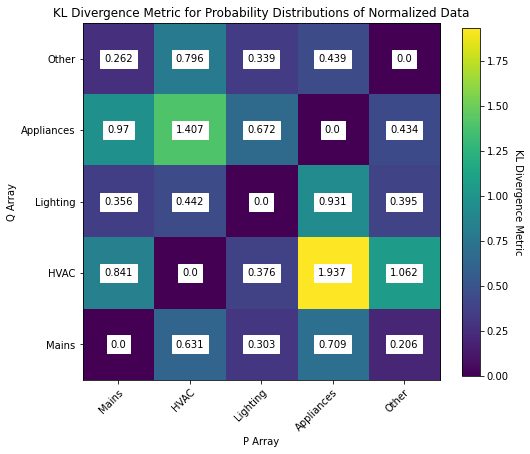

In [ ]:
#Calculate KL divergences
#The following concatenates the five use cases to allow for indexing in a for loop.
#The nested for loop creates a 5x5 array containing the KL divergence metric
#between each use case.
full_arr_KL=[mains_prob,hvac_prob,lighting_prob,appliances_prob,other_prob]
use_case = ['Mains','HVAC','Lighting','Appliances','Other']
KL_div_array=np.zeros((5,5))
#pull different p(x) and q(x) distributions to compare with one another
for x in range (0,5):
  for y in range (0,5):
    KL_div_array[x,y]=calc_KL(full_arr_KL[x],full_arr_KL[y])
    
#Plot the KL divergence metrics for each use case combination    
fig, ax = plt.subplots(figsize=(8,8))
im=ax.imshow(KL_div_array,origin='lower')
ax.set_xticks(np.arange(len(use_case)))
ax.set_yticks(np.arange(len(use_case)))
ax.set_xticklabels(use_case)
ax.set_yticklabels(use_case)
ax.set_xlabel('P Array')
ax.set_ylabel('Q Array')
cbar = ax.figure.colorbar(im, ax=ax,shrink=0.8)
cbar.ax.set_ylabel('KL Divergence Metric', rotation=-90, va="bottom")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
for j in range(len(use_case)):
    for i in range(len(use_case)):
        text = ax.text(j, i, np.round(KL_div_array[i, j], 3),ha="center", va="center", backgroundcolor="w")
ax.set_title("KL Divergence Metric for Probability Distributions of Normalized Data")
plt.show()

#As can be seen in the figure, the KL divergence metric is not symmetric, i.e.
#KL(P,Q) does not equal KL(Q,P). This is as expected given the equation, but in
#contrast with the Euclidian Distance Metric. 

In [ ]:
#To more clearly view the KL divergence between different energy uses, we can 
#take an average of KL(x,y) and KL(y,x).

for x in range (0,5):
  for y in range (0,5):
    if y > x:
      print('The average KL Divergence between', use_case[x],'and', use_case[y],
            'is:', np.round(((KL_div_array[x,y]+KL_div_array[y,x])/2),3))

The average KL Divergence between Mains and HVAC is: 0.736
The average KL Divergence between Mains and Lighting is: 0.33
The average KL Divergence between Mains and Appliances is: 0.84
The average KL Divergence between Mains and Other is: 0.234
The average KL Divergence between HVAC and Lighting is: 0.409
The average KL Divergence between HVAC and Appliances is: 1.672
The average KL Divergence between HVAC and Other is: 0.929
The average KL Divergence between Lighting and Appliances is: 0.802
The average KL Divergence between Lighting and Other is: 0.367
The average KL Divergence between Appliances and Other is: 0.437


Task 4 discussion:
The KL Divergence metric was calculated for all possible combinations of the source data. Each distance metric has been plotted in a heat map with a color bar, and the average calculated for each data array combination. 

A KL Divergence metric of zero (0) would indicate maximum similarity (i.e. the two probability distributions are the same). Higher values indicate more dissimilarity. Because we have performed this on normalized data, we are not looking at the probabilities of overall energy use, but rather how the energy use in each category is distributed between its minimum and maximum value. 

In order of most-similar (#1) to least-similar (#10), the results are:
1.   Mains vs Other
2.   Mains vs Lighting
3.   Lighting vs Other
4.   HVAC vs Lighting
5.   Appliances vs Other
6.   Mains vs HVAC
7.   Lighting vs Appliances
8.   Mains vs Appliances
9.   HVAC vs Other
10.  HVAC vs Appliances 

There are several differences seen in the results from the KL Divergence metric compared to the previous Euclidian Distance metrics. While some of the most similar data sets remain consistent, such as the Mains/Lighting, Lighting/Other, Mains/Other, the KL Divergence for Mains/HVAC was much higher than expected. The significant variability in the low range of Mains power caused by contributions from the remaining categories seems to have significantly changed the probability distrubtion compared to that of the HVAC. Other comparisons showed that the data sets with the highest Euclidian distance metric also had the highest KL divergence metric, HVAC/Appliances, but other sets with relatively high Euclidian distance metrics did not necessarily have relatively high KL divergence metric, such as Lighting/Appliances. 

This is likely due to the fact that the Euclidian distance metrics directly compares differences in values between arrays, while the KL divergence factor compares the probability distribution within those arrays - the values do not need to match along the array. The fact that several sets of data show to be most similar by both the KL Divergence and Euclidian distance metrics provides added assurance that the sets are similar.

# Task 5

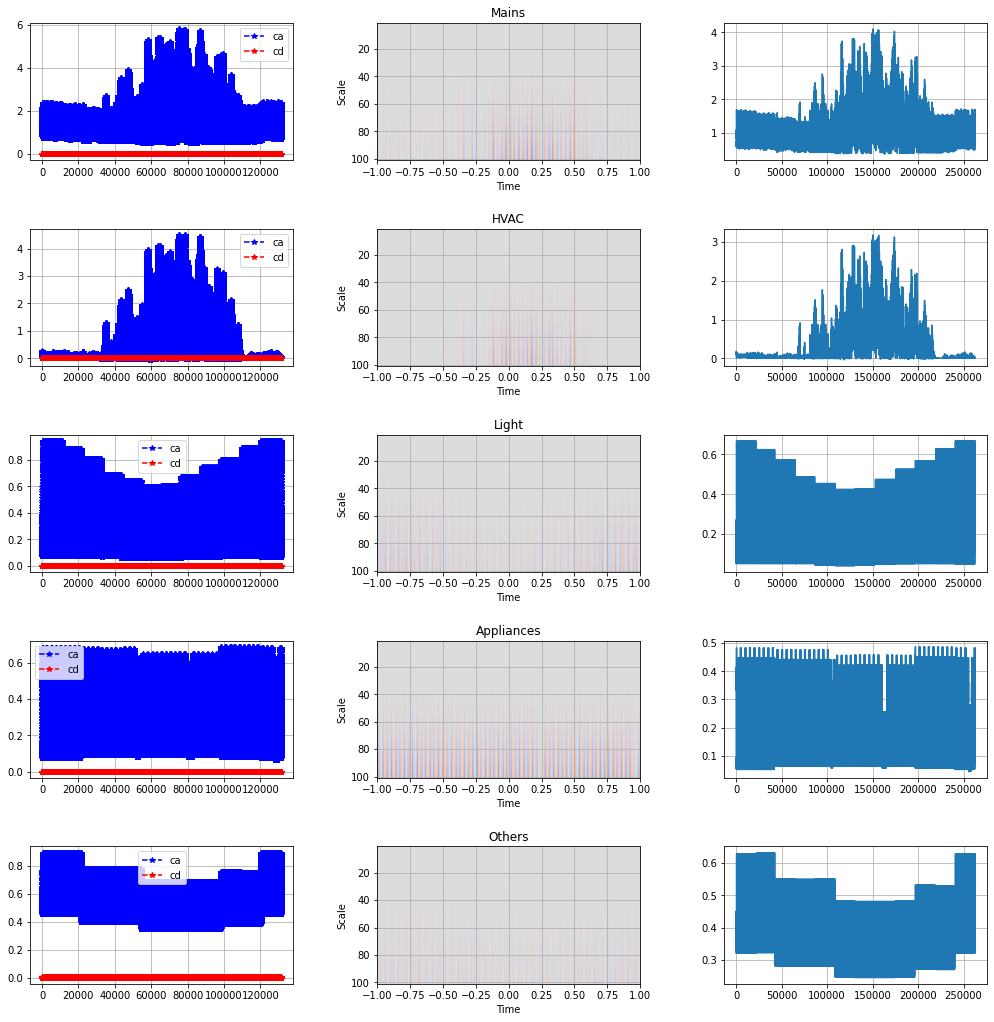

In [ ]:
import pywt
from scipy import signal
import matplotlib.pyplot as plt

all=[mains_raw,hvac_raw,lighting_raw,appliances_raw,other_raw]

fig, ax = plt.subplots(len(all),3,figsize=(15,15))
list_of_metrics=[]

#Discrete Wavelet Transform

# approximation coefficients cA, and detail coefficients cD. Convolving s with the scaling filter LoD, followed by dyadic decimation, 
# yields the approximation coefficients. Similarly, convolving s with the wavelet filter HiD, followed by dyadic decimation, yields the detail coefficients.

for i,item in enumerate(all):
  values=item.flatten()
  cA, cD = pywt.dwt(values, 'db2', mode='sp1')
  # The high pass filtered result gives you the cD coefficients. The low pass filtered result gives you the cA coefficients
  # print(cA,cD)
# Denoising
  # cat = pywt.threshold(cA, np.std(cA)/2, 'soft') # np.std(cA)/2)
  # cdt = pywt.threshold(cD, np.std(cA)/2, 'soft')
  # values_rec = pywt.idwt(cat, cdt, 'db2')
  # Original coefficients
  ax[i,0].plot(cA, '--*b')
  ax[i,0].plot(cD, '--*r')
  # Thresholded coefficients
  # ax[i,0].plot(cat, '--*c')
  # ax[i,0].plot(cdt, '--*m')
  ax[i,0].legend(['ca','cd'], loc=0)   # ,'ca_thresh', 'cd_thresh'
  ax[i,0].grid('on')
  # ax[i,1].plot(values)
  # ax[i,1].plot(values_rec, 'r')
  # ax[i,1].legend(['original signal', 'reconstructed signal'])
  # ax[i,1].grid('on')


#Continuous Wavelet Transform
# Ricker wavelet AKA “Mexican hat wavelet”: A * (1 - (x/a)**2) * exp(-0.5*(x/a)**2), where A = 2/(sqrt(3*a)*(pi**0.25)).

  widths = np.arange(1, 101)
  cwtmatr = signal.cwt(values, signal.ricker, widths)
  list_of_metrics.append(cwtmatr)
  ax[i,1].imshow(cwtmatr, extent=[-1, 1, 101, 1], cmap='coolwarm', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
  ax[i,1].grid('on')

  ax[i,2].plot(item)
  ax[i,2].grid('on')



fig.tight_layout(pad=5.0)
ax[0,1].title.set_text('Mains')
ax[0,1].set(xlabel="Time", ylabel="Scale")

ax[1,1].title.set_text('HVAC')
ax[1,1].set(xlabel="Time", ylabel="Scale")

ax[2,1].title.set_text('Light')
ax[2,1].set(xlabel="Time", ylabel="Scale")

ax[3,1].title.set_text('Appliances')
ax[3,1].set(xlabel="Time", ylabel="Scale")

ax[4,1].title.set_text('Others')
ax[4,1].set(xlabel="Time", ylabel="Scale")
plt.show()

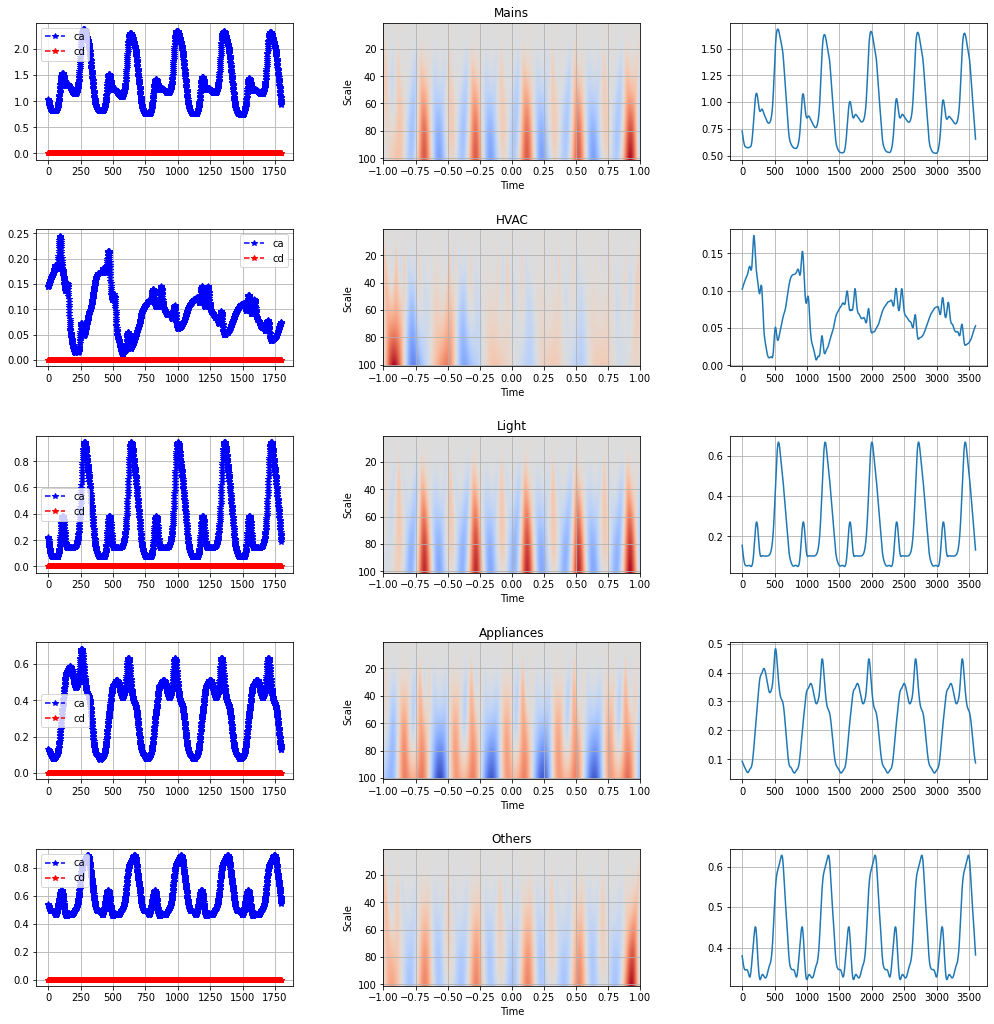

In [ ]:
# Same process in a 1 hour window
import pywt
from scipy import signal
import matplotlib.pyplot as plt

all=[mains_raw[:3600],hvac_raw[:3600],lighting_raw[:3600],appliances_raw[:3600],other_raw[:3600]]

fig, ax = plt.subplots(len(all),3,figsize=(15,15))
list_of_metrics=[]

for i,item in enumerate(all):
  values=item.flatten()
  cA, cD = pywt.dwt(values, 'db2', mode='sp1')

  ax[i,0].plot(cA, '--*b')
  ax[i,0].plot(cD, '--*r')
  ax[i,0].legend(['ca','cd'], loc=0)   # ,'ca_thresh', 'cd_thresh'
  ax[i,0].grid('on')


  widths = np.arange(1, 101)
  cwtmatr = signal.cwt(values, signal.ricker, widths)
  list_of_metrics.append(cwtmatr)
  ax[i,1].imshow(cwtmatr, extent=[-1, 1, 101, 1], cmap='coolwarm', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
  ax[i,1].grid('on')

  ax[i,2].plot(item)
  ax[i,2].grid('on')

fig.tight_layout(pad=5.0)
ax[0,1].title.set_text('Mains')
ax[0,1].set(xlabel="Time", ylabel="Scale")

ax[1,1].title.set_text('HVAC')
ax[1,1].set(xlabel="Time", ylabel="Scale")

ax[2,1].title.set_text('Light')
ax[2,1].set(xlabel="Time", ylabel="Scale")

ax[3,1].title.set_text('Appliances')
ax[3,1].set(xlabel="Time", ylabel="Scale")

ax[4,1].title.set_text('Others')
ax[4,1].set(xlabel="Time", ylabel="Scale")
plt.show()

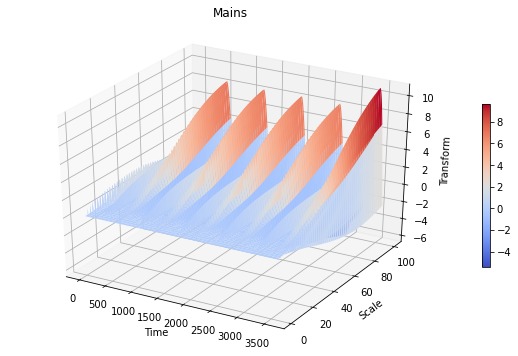

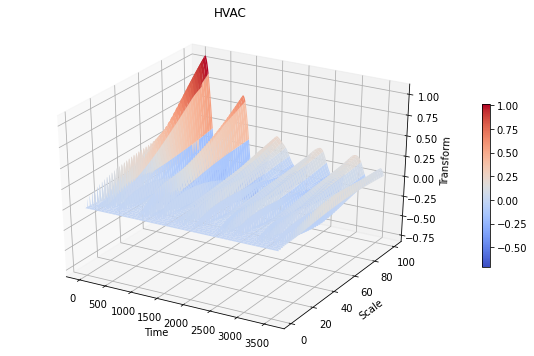

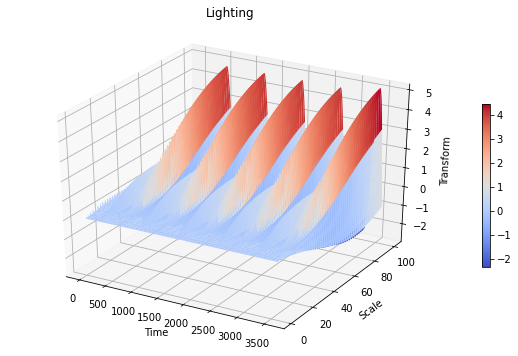

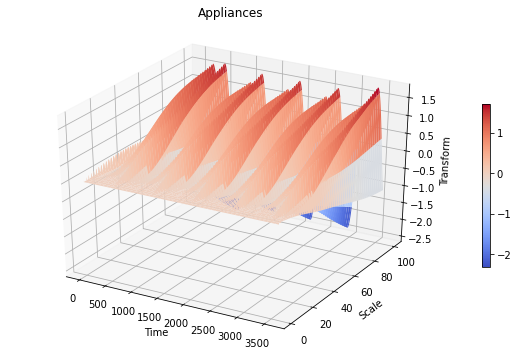

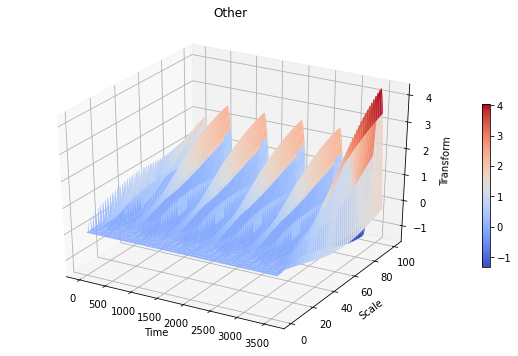

In [ ]:
#3D visualization
import pywt
from scipy import signal
import matplotlib.pyplot as plt

use_case = ['Mains','HVAC','Lighting','Appliances','Other']
all=[mains_raw[:3600],hvac_raw[:3600],lighting_raw[:3600],appliances_raw[:3600],other_raw[:3600]]
for i,item in enumerate(all):
  values=item.flatten()
  widths = np.arange(1, 101)
  cwtmatr = signal.cwt(values, signal.ricker, widths)
  X, Y = np.meshgrid(range(len(item)),widths)
  Z = cwtmatr

  fig = plt.figure(figsize=(10,6))
  ax = fig.gca(projection='3d')
  surf = ax.plot_surface(X, Y, Z, cmap="coolwarm")


  ax.title.set_text(use_case[i])
  ax.set_xlabel('Time')
  ax.set_ylabel('Scale')
  ax.set_zlabel('Transform')
  fig.colorbar(surf, shrink=0.5)
plt.show()



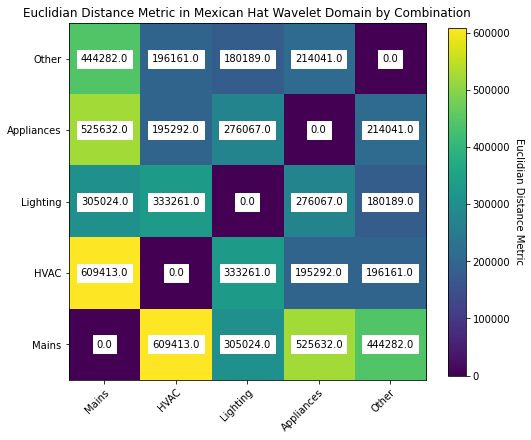

In [ ]:
def calculate_euclidian_dist(array1,array2):
  distance_metric=np.sum(np.abs(array1-array2))
  return distance_metric

full_arr=list_of_metrics

use_case = ['Mains','HVAC','Lighting','Appliances','Other']
euclid_dist_array=np.zeros((5,5))
for x in range (0,5):
  for y in range (0,5):
      euclid_dist_array[x,y]=calculate_euclidian_dist(full_arr[x],full_arr[y])

#Plot the euclidian distance metrics for each use case combination    
fig, ax = plt.subplots(figsize=(8,8))
im=ax.imshow(euclid_dist_array,origin='lower')
ax.set_xticks(np.arange(len(use_case)))
ax.set_yticks(np.arange(len(use_case)))
ax.set_xticklabels(use_case)
ax.set_yticklabels(use_case)
cbar = ax.figure.colorbar(im, ax=ax,shrink=0.8)
cbar.ax.set_ylabel('Euclidian Distance Metric', rotation=-90, va="bottom")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
for j in range(len(use_case)):
    for i in range(len(use_case)):
        text = ax.text(j, i, np.rint(euclid_dist_array[i, j]),ha="center", va="center", backgroundcolor="w")
ax.set_title("Euclidian Distance Metric in Mexican Hat Wavelet Domain by Combination")
plt.show()



Task 5 discussion: The signal was transformed using Wavelet Transformation. Specifically, the Mexican Hat Wavelet of the Conitinuous Wavelet Transformation was used. 

We also tried to show the principle of denoising using the discrete wavelet transformation.

Euclidian distance metric in Wavelet Transform domain was calculated for all possible combinations of the source data. Each distance metric is plotted in a heat map with a color bar.

A euclidian distance value of zero (0) would indicate maximum similarity (i.e. the two signals are the same). Higher values indicate more dissimilarity.

In order of most-similar (#1) to least-similar (#10), the results are:

1. Lighting vs Other
2. HVAC vs Appliances
3. HVAC vs Other
4. Appliances vs Other
5. Lighting vs Appliances
6. Mains vs Lighting
7. HVAC vs Lighting
8. Mains vs Other
9. Mains vs Appliances
10. Mains vs HVAC

Differences are observed between the ranking resulting from Time series domain and Fourier Transform. This indicates that there may be differences in magnitude across each domain.
Which can be seen in the following Chart

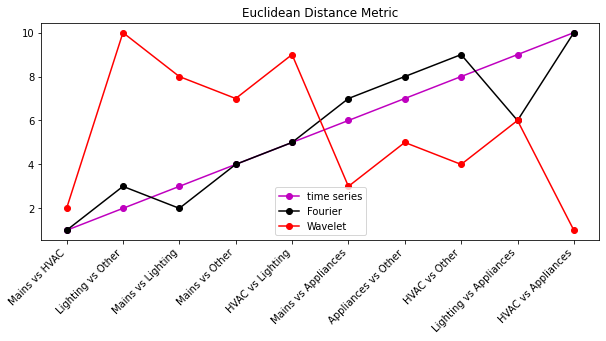

In [ ]:
pp=["Mains vs HVAC","Lighting vs Other","Mains vs Lighting","Mains vs Other","HVAC vs Lighting","Mains vs Appliances","Appliances vs Other","HVAC vs Other","Lighting vs Appliances","HVAC vs Appliances"]

tt=[1,2,3,4,5,6,7,8,9,10]
ft=[1,3,2,4,5,7,8,9,6,10]
wt=[2,10,8,7,9,3,5,4,6,1]
plt.figure(figsize=(10,4))
plt.title("Euclidean Distance Metric")
line1 = plt.plot(pp, tt,'mo-',label='time series')
line2 = plt.plot(pp, ft,'ko-',label='Fourier ')
line3 = plt.plot(pp, wt,'ro-',label='Wavelet')
plt.legend()
xticks=plt.xticks(rotation=45, ha='right')

# Task 6

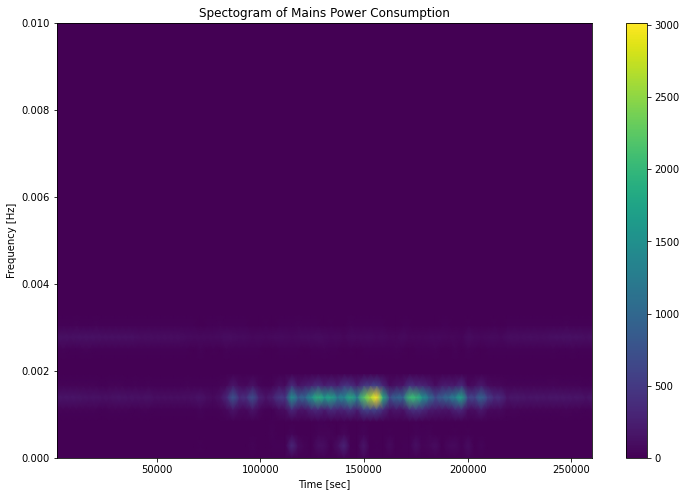

In [ ]:
# This is modified by Nianyu Jiang @ 03/07/2022

# In this task, Use windowed spectrogram to identify motifs in the main power data to detect
# changes in time-series characteristics.

# import bunch of libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import scipy.io
from scipy import signal
from scipy.fft import fftshift

# use pandas for a better data frame, can be deleted if this is done by other users
MAINS_mat = scipy.io.loadmat('MAINS.mat') #y1
HVAC_mat = scipy.io.loadmat('HVAC.mat') #y2
LIGHTING_mat = scipy.io.loadmat('LIGHTING.mat') #y3
APPLIANCES_mat = scipy.io.loadmat('APPLIANCES.mat') #y4
OTHER_LOADS_mat = scipy.io.loadmat('OTHER_LOADS.mat') #y5
#print(MAINS_mat) # Test the loadmat form
MAINS = [[element for element in upperElement] for upperElement in MAINS_mat['y1']]
HAVC = [[element for element in upperElement] for upperElement in HVAC_mat['y2']]
LIGHTING = [[element for element in upperElement] for upperElement in LIGHTING_mat['y3']]
APPLIANCES = [[element for element in upperElement] for upperElement in APPLIANCES_mat['y4']]
OTHER_LOADS = [[element for element in upperElement] for upperElement in OTHER_LOADS_mat['y5']]
#np.shape(HAVC) # test the dataform

# compact the dataframe with pandas
newData = list(zip(MAINS[:],HAVC[:],LIGHTING[:],APPLIANCES[:],OTHER_LOADS[:]))
columns = ['MAINS','HAVC','LIGHTING','APPLIANCES','OTHER_LOAD']
Data = pd.DataFrame(newData, columns=columns)
#Data

# transfer the data to numpy for data analysis
# From my understanding, I only need to analysis 'MAINS' column, correct me if I need to do more 
MAINS_np = np.stack(Data['MAINS']) # somehow I got the original data is "list" form so I have to use .stack to create a new array
#plt.figure
#plt.plot(MAINS_np)
#plt.show()

# use scipy for spectrogram
import scipy.signal
# can be used to compue moving average, this is similar to the example code from ME592
def apply_convolution(sig, window):
    conv = np.repeat([0., 1., 0.], window)
    #print('Convolution Kernel:', conv)
    win = scipy.signal.windows.hann(50) # apply hann window for a more smooth filter
    filtered = scipy.signal.convolve(sig, conv, mode='same') / sum(win)
    return filtered

# apply a median filter, arguments are (volume, kernel)
filtered = scipy.signal.medfilt(MAINS_np[:,0], 999) # data size is 262,800 so I used a much larger window
# apply a convolution filter
convolved = apply_convolution(MAINS_np[:,0], 999)

# Spectrogram analysis to MAINS
fs = 1 # sampling rate is 1hz
#f, t, Sxx = signal.spectrogram(MAINS_np[:,0], fs) # use .spectrogram from scipy, f = Array of sample frequencies, 
                                                  # t = Array of segment times, Sxx = Spectrogram of x.

# Spectrogram analysis to MAINS - Casey 3/8/22, Nianyu 03/09/22 by editing the nperseg we got a more clear lines at frequency (as main frequency I guess)
fs = 1 # sampling rate is 1hz
window=scipy.signal.get_window('hamming',Nx = 3600)
nperseg = len(window)
f_c, t_c, Sxx_c = signal.spectrogram(MAINS_np[:,0], fs, nperseg=len(window), window=('hamming'), noverlap=None) # use .spectrogram from scipy, f = Array of sample frequencies, 
                                                  # t = Array of segment times, Sxx = Spectrogram of x.
#plt.pcolormesh(t, f, Sxx, shading='gouraud') # check the spectrogram of x
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [sec]')
#plt.ylim(0,0.01)
#plt.show()
#plt.pcolormesh(t, f, Sxx, shading='gouraud') # check the spectrogram of x
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [sec]')
#plt.xlim(1000,3600)
#plt.ylim(0,0.01)
#plt.show()

fig,ax=plt.subplots(figsize=(12,8))
im=ax.pcolormesh(t_c, f_c, Sxx_c, shading='gouraud') # check the spectrogram of x
fig.colorbar(im, ax=ax)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_title('Spectogram of Mains Power Consumption')
ax.set_ylim(0,0.01)
plt.show()

In [ ]:
# By looking at a random hour from the Spectrogram I cannot tell too much useful information, the MAINS data seems have a 
# extremy flat features but the frequency is shown in time segment which means the MAINS power is fluctuated at different
# time segment which has a period of 10min.
# however, the MAINS does fluctuate more in the middle, which is related with the more time consumption.

#crobinson 3/8/22 - dominant frequency in all the signals seems to be 0.001388888Hz (1 cycle per 12 minutes), with
#harmonics present as well (integer multiples of base/dominant frequency).
#The magnitude of that frequency increases in the the middle section (around t=110000sec to 200000sec) due to 
#the HVAC power consumption drastically increasing at that time. HVAC power also has the same dominant frequency.
#Note in the third figure the horizontal row of brighter light at around 0.001388888Hz (showing peaks near 155000s), along with a dark/faint but
#still visible first harmonic at around 0.00277777777Hz